In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [21]:
f = open("images/sino0.txt", 'r')
line0 = f.read()
print(line0)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [22]:
import numpy as np
metal0_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line0):
    if j == '\t':
        metal0_img[k,l] = float(line0[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

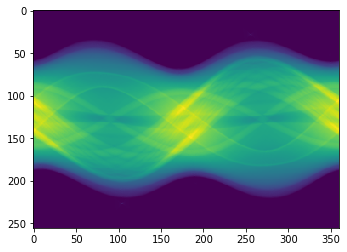

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal0_img)
plt.colorbar

In [24]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [25]:
import numpy as np
metal3_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

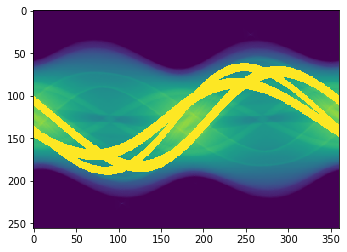

In [26]:
plt.imshow(metal3_img)
plt.colorbar

In [27]:
metal3_img.shape

(256, 360)

In [28]:
result_img = metal0_img/10
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 25:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 5:
                        z = 0
                    else:
                        k = k+1
train_data = np.empty((k,window_size,window_size,1))
result_data = np.empty((k,1))

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [30]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [31]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 25:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 5:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(16830, 3, 3, 1)
(16830, 1)
Epoch 1/1000
526/526 [==============================] - 1s 1ms/step - loss: 2.4689 - accuracy: 0.1816
Epoch 2/1000
526/526 [==============================] - 1s 1ms/step - loss: 1.4028 - accuracy: 0.4163
Epoch 3/1000
526/526 [==============================] - 1s 1ms/step - loss: 1.1936 - accuracy: 0.4929
Epoch 4/1000
526/526 [==============================] - 1s 1ms/step - loss: 1.0860 - accuracy: 0.5367
Epoch 5/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.9761 - accuracy: 0.5872
Epoch 6/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.8881 - accuracy: 0.6181
Epoch 7/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.8276 - accuracy: 0.6543
Epoch 8/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.7994 - accuracy: 0.6645
Epoch 9/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.7657 - accuracy: 0.6752
Epoch 10/1000
526/526 [==============================]

Epoch 80/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4807 - accuracy: 0.7984
Epoch 81/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4768 - accuracy: 0.7999
Epoch 82/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4704 - accuracy: 0.7999
Epoch 83/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4585 - accuracy: 0.8084
Epoch 84/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4687 - accuracy: 0.8022
Epoch 85/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4668 - accuracy: 0.8040
Epoch 86/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4608 - accuracy: 0.8083
Epoch 87/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4531 - accuracy: 0.8107
Epoch 88/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4722 - accuracy: 0.7998
Epoch 89/1000
526/526 [==============================] - 1s 1ms/step - lo

526/526 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8283
Epoch 159/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4234 - accuracy: 0.8191
Epoch 160/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8279
Epoch 161/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4190 - accuracy: 0.8216
Epoch 162/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.8250
Epoch 163/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8238
Epoch 164/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8251
Epoch 165/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4153 - accuracy: 0.8230
Epoch 166/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.4064 - accuracy: 0.8256
Epoch 167/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3836 - accuracy: 0.8386
Epoch 237/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3878 - accuracy: 0.8354
Epoch 238/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8371
Epoch 239/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3892 - accuracy: 0.8361
Epoch 240/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3816 - accuracy: 0.8390
Epoch 241/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3919 - accuracy: 0.8364
Epoch 242/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3957 - accuracy: 0.8333
Epoch 243/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3966 - accuracy: 0.8324
Epoch 244/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3817 - accuracy: 0.8399
Epoch 245/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8460
Epoch 315/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 0.8453
Epoch 316/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3760 - accuracy: 0.8425
Epoch 317/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3775 - accuracy: 0.8433
Epoch 318/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3726 - accuracy: 0.8460
Epoch 319/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3724 - accuracy: 0.8463
Epoch 320/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.8486
Epoch 321/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3720 - accuracy: 0.8447
Epoch 322/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3663 - accuracy: 0.8475: 0s - loss: 0.364
Epoch 323/1000
526/526 [==============================] - 1s 

526/526 [==============================] - 1s 1ms/step - loss: 0.3592 - accuracy: 0.8474
Epoch 393/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.8497
Epoch 394/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3709 - accuracy: 0.8466
Epoch 395/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3689 - accuracy: 0.8451
Epoch 396/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3721 - accuracy: 0.8455
Epoch 397/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3588 - accuracy: 0.8507
Epoch 398/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3681 - accuracy: 0.8460
Epoch 399/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8482
Epoch 400/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3622 - accuracy: 0.8473
Epoch 401/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8496
Epoch 471/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3557 - accuracy: 0.8512
Epoch 472/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3586 - accuracy: 0.8509
Epoch 473/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3515 - accuracy: 0.8526
Epoch 474/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3536 - accuracy: 0.8522
Epoch 475/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8496
Epoch 476/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3581 - accuracy: 0.8474
Epoch 477/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3513 - accuracy: 0.8548
Epoch 478/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3514 - accuracy: 0.8532
Epoch 479/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3518 - accuracy: 0.8556
Epoch 549/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3524 - accuracy: 0.8518
Epoch 550/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8566
Epoch 551/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3522 - accuracy: 0.8533
Epoch 552/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3444 - accuracy: 0.8569
Epoch 553/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3477 - accuracy: 0.8555
Epoch 554/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3497 - accuracy: 0.8523
Epoch 555/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3528 - accuracy: 0.8523
Epoch 556/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3437 - accuracy: 0.8556
Epoch 557/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3430 - accuracy: 0.8561
Epoch 627/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3462 - accuracy: 0.8553
Epoch 628/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3398 - accuracy: 0.8578
Epoch 629/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3410 - accuracy: 0.8567
Epoch 630/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8575
Epoch 631/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3406 - accuracy: 0.8582
Epoch 632/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3473 - accuracy: 0.8525
Epoch 633/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3448 - accuracy: 0.8565
Epoch 634/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3469 - accuracy: 0.8578
Epoch 635/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3423 - accuracy: 0.8584
Epoch 705/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3406 - accuracy: 0.8586
Epoch 706/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8568
Epoch 707/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3414 - accuracy: 0.8573
Epoch 708/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.8583
Epoch 709/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8583
Epoch 710/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8578
Epoch 711/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3429 - accuracy: 0.8566
Epoch 712/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3396 - accuracy: 0.8585
Epoch 713/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3348 - accuracy: 0.8605
Epoch 783/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.8616
Epoch 784/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3353 - accuracy: 0.8626
Epoch 785/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8585
Epoch 786/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3300 - accuracy: 0.8619
Epoch 787/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3344 - accuracy: 0.8605
Epoch 788/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3352 - accuracy: 0.8592
Epoch 789/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3381 - accuracy: 0.8596
Epoch 790/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3327 - accuracy: 0.8610
Epoch 791/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8649
Epoch 861/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3338 - accuracy: 0.8581
Epoch 862/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3401 - accuracy: 0.8602
Epoch 863/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3262 - accuracy: 0.8657
Epoch 864/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3330 - accuracy: 0.8608
Epoch 865/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3304 - accuracy: 0.8622
Epoch 866/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8619
Epoch 867/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3269 - accuracy: 0.8651
Epoch 868/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8622
Epoch 869/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

526/526 [==============================] - 1s 1ms/step - loss: 0.3258 - accuracy: 0.8639
Epoch 939/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3293 - accuracy: 0.8623
Epoch 940/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3295 - accuracy: 0.8642
Epoch 941/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8614
Epoch 942/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3289 - accuracy: 0.8646
Epoch 943/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3286 - accuracy: 0.8609
Epoch 944/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3317 - accuracy: 0.8629
Epoch 945/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3330 - accuracy: 0.8626
Epoch 946/1000
526/526 [==============================] - 1s 1ms/step - loss: 0.3337 - accuracy: 0.8617
Epoch 947/1000
526/526 [==============================] - 1s 1ms/step - loss: 0

In [32]:
test_img = metal3_img/10

In [33]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 30 in test_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if test_img[i+window_size,j] == 30:
                test_data = np.empty((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = test_img[i+w,j+v]
                prediction = model.predict(test_data)
                test_img[i+window_size,j] = np.argmax(prediction)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

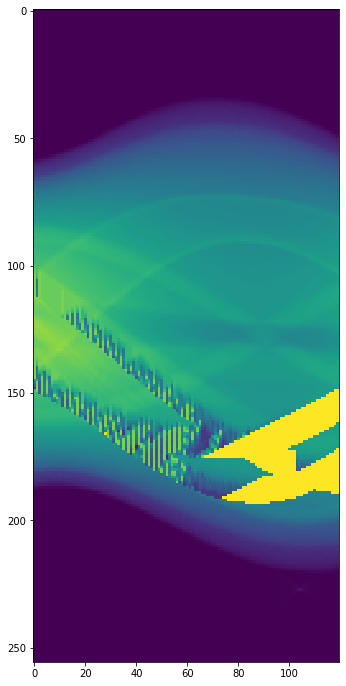

In [34]:
plt.figure(figsize=(8,12))
plt.imshow(test_img[:,0:120])
plt.colorbar

In [35]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [36]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)